In [14]:
from advectionGPdatasets.roundhill import RoundHill
from advectionGPdatasets import proposeboundary
from advectionGP.models import AdjointAdvectionDiffusionModel as Model
from advectionGP.sensors import FixedSensorModel #Builds sensor arrays to generate data for foward model or to generate observations for comparison
from advectionGP.kernels import EQ #Generates exponentiated quadratic kernel approximation
from advectionGP.wind import WindSimple
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
rh = RoundHill()
X = rh.experiments[0].X
Y = rh.experiments[0].Y
boundary = proposeboundary(X)
boundary[0][2]=-30 #puts the source on the grid!

In [19]:
windvect = [rh.experiments[0].windX,rh.experiments[0].windY]
print(windvect)

[-0.9943022826340254, 1.8949836333722694]


In [20]:
X = X[::4,:]
Y = Y[::4]

(-198.7, 80.7, -42.4, 230.4)

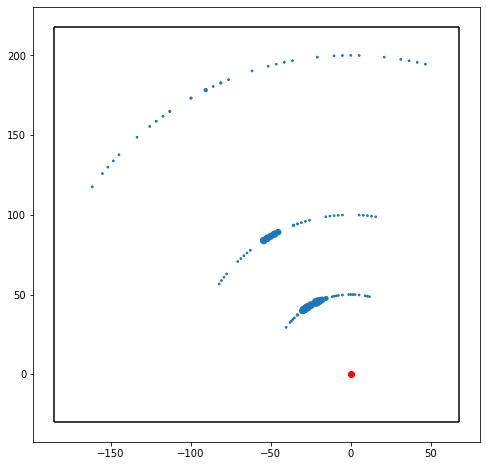

In [21]:
plt.figure(figsize=[8,8])
plt.scatter(X[:,2],X[:,3],3+Y/10)
plt.hlines([boundary[0][2],boundary[1][2]],boundary[0][1],boundary[1][1])
plt.vlines([boundary[0][1],boundary[1][1]],boundary[0][2],boundary[1][2])
plt.plot([0],[0],'or')
plt.axis('equal')

In [22]:
Y /= np.max(Y)

In [11]:
#set up our model...
N_feat =300 #Number of features used to infer the source
k = EQ(40, 2) 
res = [50,200,200]
noiseSD = 0.1
sensors = FixedSensorModel(X,5)
windmodel=WindSimple(rh.experiments[0].windX,rh.experiments[0].windY)
k_0 = 0.01
mInfer = Model(resolution=res,boundary=boundary,N_feat=N_feat,noiseSD=noiseSD,kernel=k,sensormodel=sensors,windmodel=windmodel,k_0=k_0) #Initiate new model for inference
mInfer.computeModelRegressors() # Compute regressor matrix
meanZ, covZ = mInfer.computeZDistribution(Y) # Infers z vector mean and covariance using regressor matrix
sourceInfer = mInfer.computeSourceFromPhi(meanZ) # Generates estimated source using mean of the inferred distribution
concInfer=mInfer.computeConcentration(sourceInfer) # Generates estimated concentration from inferred source

Calculating Adjoints...
38/39 
Calculating Phis...


KeyboardInterrupt: 

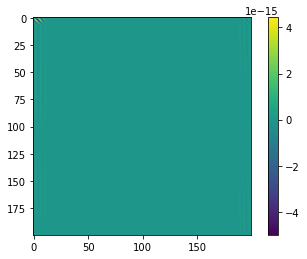

In [60]:
plt.imshow(concInfer[25,:,:])
plt.colorbar()

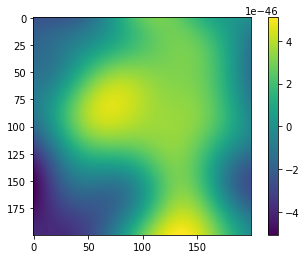

In [61]:
plt.imshow(sourceInfer[25,:,:])
plt.colorbar()